In [4]:
%matplotlib inline

import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

In [5]:
# first figure out if we can reproduce mean/covar normalization

d=3
n_samps=500
al = -3
for i in range(5): # repeat 5 times
    r = 2.0**al
    n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
    env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


    #nonlin = torch.nn.ELU()
    nonlin = torch.nn.functional.relu
    layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
    save_dir = "./"
    n_episodes = 500 # total batches to draw
    batch_size = 64
    learning_rate = .001
    save_every = int(n_episodes/4) # save the model every so often
    encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
    mixnet = srt.SoftmaxNet([3,6])
    prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=0,mean_coeff = r, covar_coeff=1)
    deterministic_args = None 

    traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

    net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/2021-1-25a")
    wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
    X = np.empty((n_samps,d))
    for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
        X[i,:] = wenv.reset(state=[ang,0])
        #env.render()
    plt.figure()
    xhat = utils.visualize_trajectory(X)
    

/home/holdenlee/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


KeyboardInterrupt: 

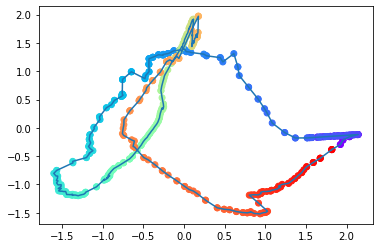

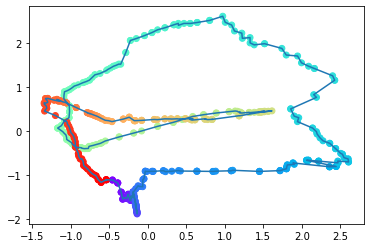

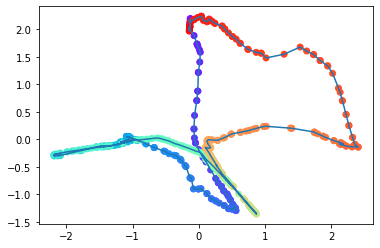

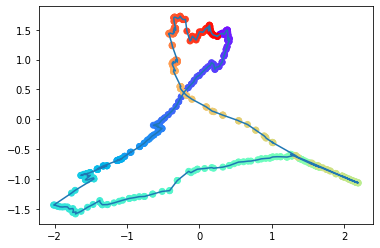

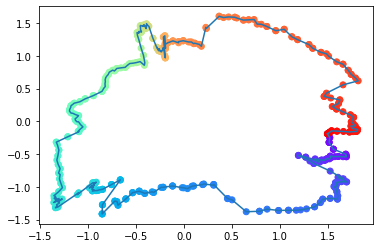

In [5]:
# first figure out if we can reproduce mean/covar normalization

d=3
n_samps=500
al = 0
for i in range(5): # repeat 5 times
    r = 2.0**al
    n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
    env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


    #nonlin = torch.nn.ELU()
    nonlin = torch.nn.functional.relu
    layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
    save_dir = "./"
    n_episodes = 500 # total batches to draw
    batch_size = 64
    learning_rate = .001
    save_every = int(n_episodes/4) # save the model every so often
    encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
    mixnet = srt.SoftmaxNet([3,6])
    prednet = srt.MixtureForwardNet(encnet,layers[-1],1,6,mixnet,alpha=0,mean_coeff = r, covar_coeff=1)
    deterministic_args = None 

    traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

    net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/2021-1-25a")
    wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
    X = np.empty((n_samps,d))
    for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
        X[i,:] = wenv.reset(state=[ang,0])
        #env.render()
    plt.figure()
    xhat = utils.visualize_trajectory(X)
    

In [6]:
class Optimizer:
    def __init__(self, alpha):
        self.alpha = alpha
    def opt_schedule(self, step_fn, steps):
        for i in range(steps):
            self.alpha = step_fn(i)
            self.optimize()
    def optimize(self):
        raise NotImplemented

class DSOptimizer(Optimizer):
    def __init__(self, alpha):
        super(DSOptimizer, self).__init__(alpha)
        d=3
        n_samps=500
        al = 0
        r = 2.0**al
        n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
        env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)

        #nonlin = torch.nn.ELU()
        nonlin = torch.nn.functional.relu
        layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
        save_dir = "./"
        n_episodes = 100 # total batches to draw
        batch_size = 64
        learning_rate = .001
        save_every = int(n_episodes/4) # save the model every so often
        self.encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
        self.mixnet = srt.SoftmaxNet([3,6])
        self.prednet = srt.MixtureForwardNet(self.encnet,layers[-1],1,6,self.mixnet,alpha=self.alpha,mean_coeff = r, covar_coeff=1)
        deterministic_args = None 
    def optimize(self):
        d=3
        n_samps=500
        al = 0
        r = 2.0**al
        n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
        env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)

        #nonlin = torch.nn.ELU()
        nonlin = torch.nn.functional.relu
        layers = [50, 10, 3] # architecture of encoder after the 2 conv layers
        save_dir = "./"
        n_episodes = 100 # total batches to draw
        batch_size = 64
        learning_rate = .001
        save_every = int(n_episodes/4) # save the model every so often
        
        self.prednet.alpha = self.alpha
        traj_sampler = srt.SimpleTrajectorySampler(env,
                                         srt.sample_pendulum_action_batch_zero,
                                         srt.sample_pendulum_state_batch_old,
                                         device=torch.device("cpu"),
                                         deterministic=False,
                                         deterministic_args=deterministic_args)

        net, losses = srt.train_encoder(self.prednet,traj_sampler,n_episodes,
                                    batch_size=batch_size,
                                    track_loss_every=int(n_episodes/10),
                                    lr=learning_rate,
                                    save_every=save_every,
                                    save_path=save_dir+"/2021-1-25b")
        wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
        X = np.empty((n_samps,d))
        for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
            X[i,:] = wenv.reset(state=[ang,0])
            #env.render()
        plt.figure()
        xhat = utils.visualize_trajectory(X)


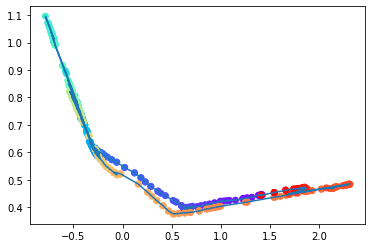

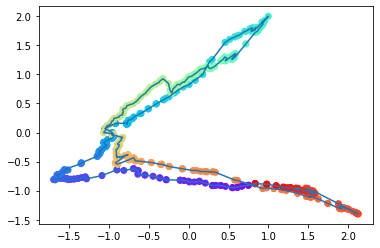

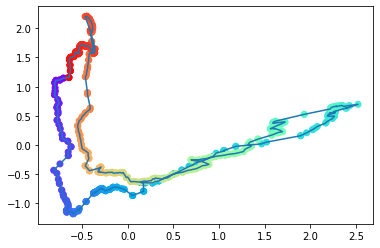

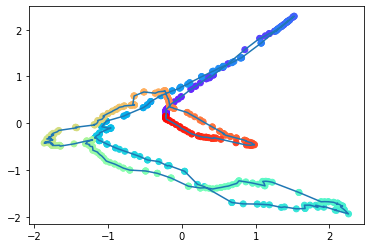

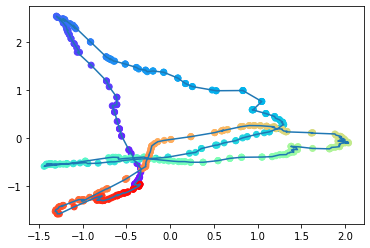

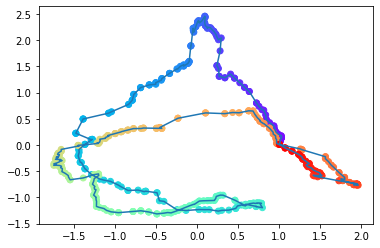

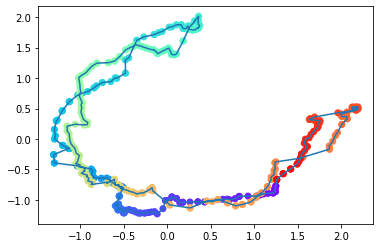

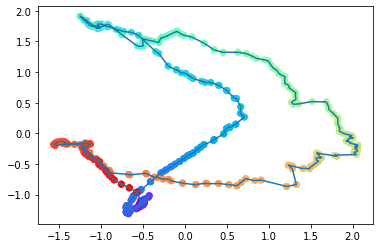

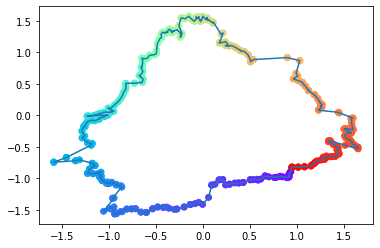

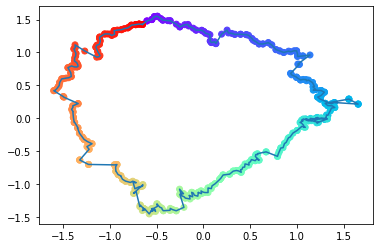

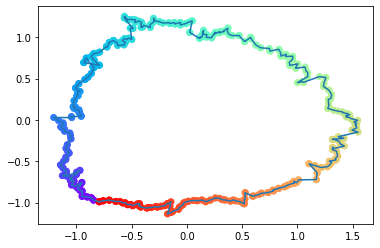

In [7]:
dsopt = DSOptimizer(0)
dsopt.optimize()
dsopt.opt_schedule(lambda j: 2.0**(j-8), 10)

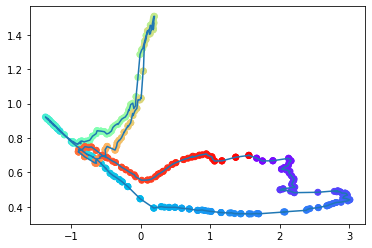

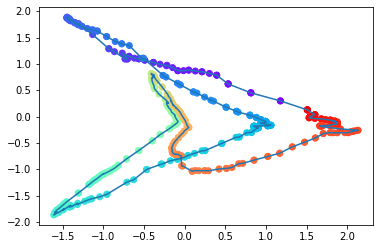

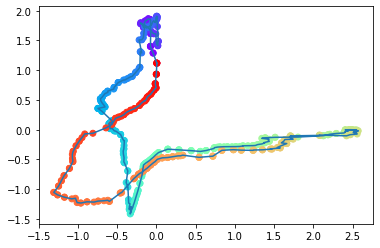

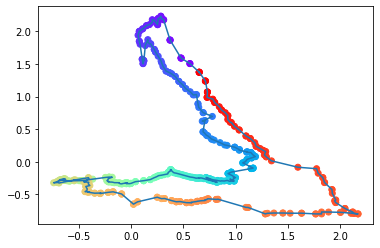

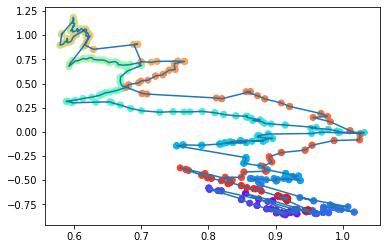

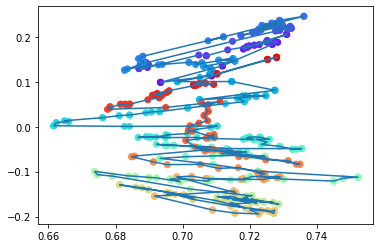

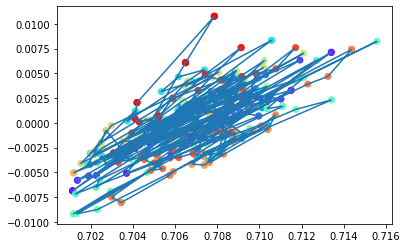

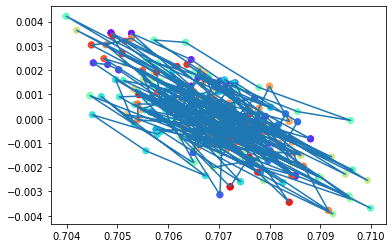

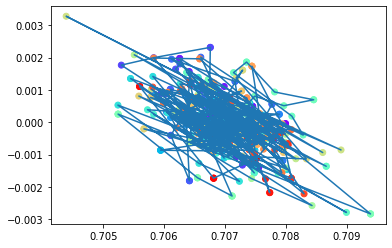

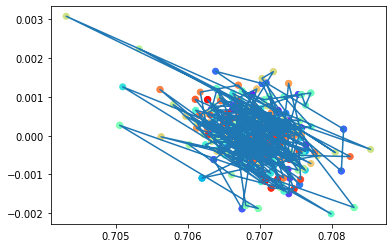

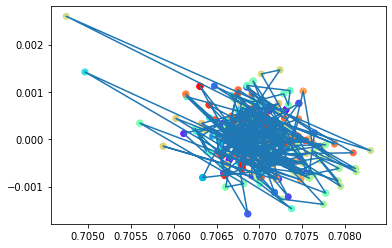

In [26]:
class Optimizer:
    def __init__(self, alpha):
        self.alpha = alpha
    def opt_schedule(self, step_fn, steps):
        for i in range(steps):
            self.alpha = step_fn(i)
            self.optimize()
    def optimize(self):
        raise NotImplemented

class DSOptimizer(Optimizer):
    def __init__(self, alpha):
        super(DSOptimizer, self).__init__(alpha)
        d=3
        n_samps=500
        al = 0
        r = 2.0**al
        n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
        env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)

        #nonlin = torch.nn.ELU()
        nonlin = torch.nn.functional.relu
        layers = [50, 10, 5] # architecture of encoder after the 2 conv layers
        save_dir = "./"
        n_episodes = 100 # total batches to draw
        batch_size = 64
        learning_rate = .001
        save_every = int(n_episodes/4) # save the model every so often
        self.encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
        self.mixnet = srt.SoftmaxNet([5,10])
        self.prednet = srt.MixtureForwardNet(self.encnet,layers[-1],1,10,self.mixnet,alpha=self.alpha,mean_coeff = r, covar_coeff=1)
        deterministic_args = None 
    def optimize(self):
        d=5
        n_samps=500
        al = 0
        r = 2.0**al
        n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
        env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)

        #nonlin = torch.nn.ELU()
        nonlin = torch.nn.functional.relu
        layers = [50, 10, 5] # architecture of encoder after the 2 conv layers
        save_dir = "./"
        n_episodes = 100 # total batches to draw
        batch_size = 64
        learning_rate = .001
        save_every = int(n_episodes/4) # save the model every so often
        
        self.prednet.alpha = self.alpha
        traj_sampler = srt.SimpleTrajectorySampler(env,
                                         srt.sample_pendulum_action_batch_zero,
                                         srt.sample_pendulum_state_batch_old,
                                         device=torch.device("cpu"),
                                         deterministic=False,
                                         deterministic_args=deterministic_args)

        net, losses = srt.train_encoder(self.prednet,traj_sampler,n_episodes,
                                    batch_size=batch_size,
                                    track_loss_every=int(n_episodes/10),
                                    lr=learning_rate,
                                    save_every=save_every,
                                    save_path=save_dir+"/2021-1-25c")
        wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
        X = np.empty((n_samps,d))
        for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
            X[i,:] = wenv.reset(state=[ang,0])
            #env.render()
        plt.figure()
        xhat = utils.visualize_trajectory(X)
dsopt = DSOptimizer(0)
dsopt.optimize()
dsopt.opt_schedule(lambda j: 2.0**(j-8), 10)

In [8]:
%matplotlib inline

import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
rep_dim = 3
nonlin = torch.nn.functional.relu
layers = [50, 10, rep_dim] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often


encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([rep_dim,rep_dim*n_repeats])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.MixtureForwardNet(encnet,layers[-1],1,rep_dim*n_repeats,mixnet,alpha=1,mean_coeff = 0, covar_coeff=0, normalize=True)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/2021-1-25d")

torch.save(net,save_dir+"/2021-1-25d.net")



# what follows is code to visualize the representations
# d = 5 # must match the final entry in layers
# n_samps = 500
# env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
# X = np.empty((n_samps,d))
# for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
#     X[i,:] = env.reset(state=[ang,0])
# utils.visualize_trajectory(X)

#wrong
# torch.Size([64, 6]) torch.Size([64, 6, 3])
# torch.Size([64, 3]) torch.Size([64, 64, 3]) torch.Size([64, 64, 3]) torch.Size([3, 3])

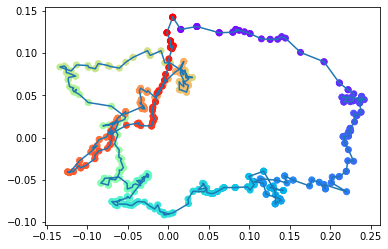

In [9]:
wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = wenv.reset(state=[ang,0])
    #env.render()
plt.figure()
xhat = utils.visualize_trajectory(X)

In [1]:
%matplotlib inline

import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 2 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)


#nonlin = torch.nn.ELU()
rep_dim = 3
nonlin = torch.nn.functional.relu
layers = [50, 10, rep_dim] # architecture of encoder after the 2 conv layers
save_dir = "./"
n_episodes = 1000 # total batches to draw
batch_size = 64
learning_rate = .001
save_every = int(n_episodes/4) # save the model every so often


encnet = srt.ConvEncoderNet(layers,env.observation_space.shape[1:],sigma=nonlin)
mixnet = srt.SoftmaxNet([rep_dim,rep_dim*n_repeats])

# use the following commented out lines for PredictorNet (I changed deterministic sampling though...
#prednet = srt.PredictorNet(encnet,T,layers[-1],1)
#deterministic_args = (samples[i], batch_size, 35, method, n_repeats,T) 

#0.1,0,10
#prednet = srt.ForwardNet(encnet,layers[-1],1)
#mixture of 5
prednet = srt.ForwardNet(encnet,layers[-1],1)
deterministic_args = None 

traj_sampler = srt.SimpleTrajectorySampler(env,
                                     srt.sample_pendulum_action_batch_zero,
                                     srt.sample_pendulum_state_batch_old,
                                     device=torch.device("cpu"),
                                     deterministic=False,
                                     deterministic_args=deterministic_args)

net, losses = srt.train_encoder(prednet,traj_sampler,n_episodes,
                                batch_size=batch_size,
                                track_loss_every=int(n_episodes/100),
                                lr=learning_rate,
                                save_every=save_every,
                                save_path=save_dir+"/2021-1-25e")

torch.save(net,save_dir+"/2021-1-25e.net")

wenv = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = wenv.reset(state=[ang,0])
    #env.render()
plt.figure()
xhat = utils.visualize_trajectory(X)

torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])


/home/holdenlee/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([64, 3])
torch.Size([64, 3])
torch.Size([64, 1]) torch.Size([1, 3]) torch.Size([6

KeyboardInterrupt: 